# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset 1
The dataset you will be using is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv"

Features:

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [3]:
# Load your training data set
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [127]:
# Split training data into X and y
df_cont = df.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month'], axis = 1)  #Exclude categorical and target variables
df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]  #categorical variables
y = df['default.payment.next.month']


## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [5]:
# Load test data set
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))


Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [128]:
# Split test data into X and y
df_test_cont = df_test.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1)  #Exclude categorical and target variables
df_test_cat = df_test[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]  #categorical variables
df_test.shape


(1000, 23)

In [129]:
#standardization and one-hot encoding

#standardization and one-hot encoding for training set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fitting the scaler to the training data and transforming training set
df_cont_std = pd.DataFrame(sc.fit_transform(df_cont), columns = df_cont.columns)


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

df_cat_encoded = pd.DataFrame(encoder.fit_transform(df_cat), columns=encoder.get_feature_names_out())

# Add new columns with 0 value to make sure all repayment_status appear for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
repayment_status_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for column in repayment_status_columns:
    unique_categories = df[column].unique()
    new_categories = np.setdiff1d(np.arange(-2, 10), unique_categories)
    for new_category in new_categories:
        df_cat_encoded[f'{column}_{new_category}'] = 0

# Display the first few rows of the encoded dataframe
print(df_cat_encoded.head())

# Resetting index to align the dataframes before combining
df_cat_encoded.reset_index(drop=True, inplace=True)
df_cont_std.reset_index(drop=True, inplace=True)

# Combining standardixed continuous and encoded categorical variables
X = pd.concat([df_cont_std, df_cat_encoded], axis=1)

# Print the shape of X
print('The shape of encoded X:', X.shape)

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    0.0    1.0          0.0          1.0          0.0          0.0   
1    0.0    1.0          0.0          1.0          0.0          0.0   
2    1.0    0.0          1.0          0.0          0.0          0.0   
3    1.0    0.0          0.0          1.0          0.0          0.0   
4    0.0    1.0          0.0          1.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_4_1  PAY_4_6  \
0          0.0          0.0         0.0         1.0  ...        0        0   
1          0.0          0.0         0.0         1.0  ...        0        0   
2          0.0          0.0         1.0         0.0  ...        0        0   
3          0.0          0.0         0.0         0.0  ...        0        0   
4          0.0          0.0         1.0         0.0  ...        0        0   

   PAY_4_8  PAY_4_9  PAY_5_1  PAY_5_8  PAY_5_9  PAY_6_1  PAY_6_8  PAY_6_9  
0        0        0        0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [130]:
#standardization and one-hot encoding for test set

# Fitting the scaler to the test data and transforming test set
df_test_cont_std = pd.DataFrame(sc.fit_transform(df_test_cont), columns = df_test_cont.columns)


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

df_test_cat_encoded = pd.DataFrame(encoder.fit_transform(df_test_cat), columns=encoder.get_feature_names_out())

# Add new columns with 0 value to make sure all repayment_status appear for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
repayment_status_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for column in repayment_status_columns:
    unique_categories_test = df_test[column].unique()
    new_categories_test = np.setdiff1d(np.arange(-2, 10), unique_categories_test)
    for new_category_test in new_categories_test:
        df_test_cat_encoded[f'{column}_{new_category_test}'] = 0

# Display the first few rows of the encoded dataframe
print(df_test_cat_encoded.head())

# Resetting index to align the dataframes before combining
df_test_cat_encoded.reset_index(drop=True, inplace=True)
df_test_cont_std.reset_index(drop=True, inplace=True)

# Combining standardixed continuous and encoded categorical variables
X_test = pd.concat([df_test_cont_std, df_test_cat_encoded], axis=1)

# Ensure the number of features in the test set matches the trained model
if X_test.shape[1] < X.shape[1]:
    # Add missing columns in the test set and set their values to 0
    missing_columns = np.setdiff1d(X.columns, X_test.columns)
    for missing_column in missing_columns:
        X_test[missing_column] = 0
# Print the shape of your X
print('The shape of encoded X_test:', X_test.shape)
print(list(X_test.columns))

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    1.0    0.0          0.0          0.0          0.0          0.0   
1    1.0    0.0          1.0          0.0          0.0          0.0   
2    0.0    1.0          1.0          0.0          0.0          0.0   
3    0.0    1.0          0.0          1.0          0.0          0.0   
4    1.0    0.0          1.0          0.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_5_6  PAY_5_7  \
0          0.0          1.0         1.0         0.0  ...        0        0   
1          0.0          0.0         0.0         1.0  ...        0        0   
2          0.0          0.0         1.0         0.0  ...        0        0   
3          0.0          0.0         0.0         1.0  ...        0        0   
4          0.0          0.0         1.0         0.0  ...        0        0   

   PAY_5_8  PAY_5_9  PAY_6_1  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  
0        0        0        0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [132]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)

X_train: (2789, 97)
y_train: (2789,)
X_val: (1196, 97)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier.


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [15]:
from sklearn.linear_model import LogisticRegression

In [133]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

### WRITE CODE HERE ###
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
### WRITE CODE HERE ###
classifier = LogisticRegression(max_iter = 200)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [135]:
# predict the output for validation dataset
### WRITE CODE HERE
y_pred = classifier.predict(X_val)

In [136]:
#Converting y_val to an array
y_val_arr = (np.array(y_val).reshape(-1, 1))

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [137]:
def my_precision(y, y_preds): #TP/(TP+FP)
  tp = 0
  fp = 0
  tn = 0
  fn = 0

  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
        tp += 1
    elif y_preds[i] == 1 and y[i] == 0:
        fp += 1
    elif y_preds[i] == 0 and y[i] == 0:
        tn += 1
    elif y_preds[i] == 0 and y[i] == 1:
        fn += 1

  precision = tp/(tp+fp)
  return precision

def my_recall(y, y_preds): #TP/(TP+FN)
  tp = 0
  fp = 0
  tn = 0
  fn = 0

  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
        tp += 1
    elif y_preds[i] == 1 and y[i] == 0:
        fp += 1
    elif y_preds[i] == 0 and y[i] == 0:
        tn += 1
    elif y_preds[i] == 0 and y[i] == 1:
        fn += 1

  recall = tp/(tp+fn)
  return recall


def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
  tp = 0
  fp = 0
  tn = 0
  fn = 0

  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
        tp += 1
    elif y_preds[i] == 1 and y[i] == 0:
        fp += 1
    elif y_preds[i] == 0 and y[i] == 0:
        tn += 1
    elif y_preds[i] == 0 and y[i] == 1:
        fn += 1

  accuracy = (tp+tn)/(tp+fp+fn+tn)
  return accuracy

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [138]:
### WRITE CODE HERE
# Calculate Precision
precision = my_precision(y_val_arr, y_pred)

# Calculate Recall
recall = my_recall(y_val_arr, y_pred)

# Calculate Accuracy
accuracy = my_accuracy(y_val_arr, y_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.6610
Recall: 0.4333
Accuracy: 0.8219


Q. Accuracy<br>
Ans - The accuracy is 0.8219.

Q. Precision<br>
Ans - The precision is 0.6610.

Q. Recall<br>
Ans - The recall is 0.4333.

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans -   Accuracy is a good metric when the class distribution is roughly equal. It provides an overall measure of how well your model is performing across all classes.

Precision is crucial when the cost of false positives is high. For example, in email spam detection, a high precision model would not incorrectly classify important emails as spam.

Recall is important when the cost of false negatives is high.It is especially crucial in cases where missing a positive instance is costly. For example, in medical diagnosis, a high recall model would identify most patients with a disease, minimizing the chance of missing a diagnosis.

If the dataset has a significant class imbalance, and the cost of false positives is high, precision might be a more appropriate metric than accuracy.

Q. Which metric is suitable in this case? <br>
Ans - Recall is suitable in this case as missing out defaults (false negatives) is costly.The consequences of missing an actual defaulter (false negative) are significant because while precision is crucial, you also want to identify as many true defaulters as possible to minimize financial losses. Missing a customer who is likely to default could lead to financial repercussions for the credit provider.

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

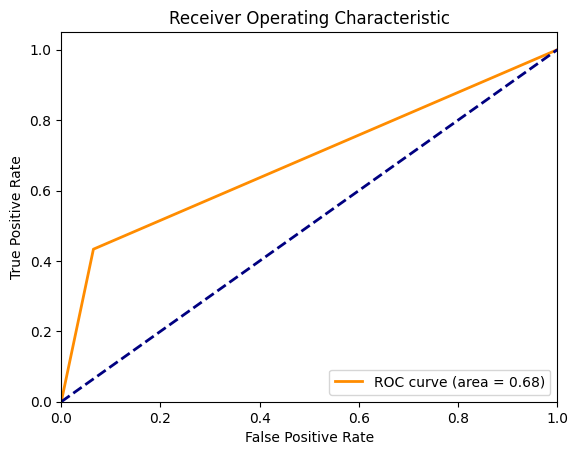

In [139]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q. What is the AUC obtained?<br>
Ans - The AUC obtained is 0.6843.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [142]:
### WRITE CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1800)
param_grid = {
    'penalty': ['l1'],
    'C': [0.1],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f'Best Score: {best_score:.4f}')

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_val)

precision = my_precision(y_val_arr, y_pred)
recall = my_recall(y_val_arr, y_pred)
accuracy = my_accuracy(y_val_arr, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.3600
Precision: 0.6805
Recall: 0.4259
Accuracy: 0.8253


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [33]:
### WRITE CODE HERE
classifier = LogisticRegression(max_iter=1800)
param_grid = {
    'penalty': ['l1'],
    'C': [0.5],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f'Best Score: {best_score:.4f}')

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_val)

precision = my_precision(y_val_arr, y_pred)
recall = my_recall(y_val_arr, y_pred)
accuracy = my_accuracy(y_val_arr, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.814984266712998
Precision: 0.6686
Recall: 0.4333
Accuracy: 0.8236


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [34]:
### WRITE CODE HERE
classifier = LogisticRegression(max_iter=1800)
param_grid = {
    'penalty': ['l2'],
    'C': [0.1],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f'Best Score: {best_score:.4f}')

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_val)

precision = my_precision(y_val_arr, y_pred)
recall = my_recall(y_val_arr, y_pred)
accuracy = my_accuracy(y_val_arr, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8124753061395211
Precision: 0.6628
Recall: 0.4222
Accuracy: 0.8211


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [36]:
### WRITE CODE HERE
classifier = LogisticRegression(max_iter=1800)
param_grid = {
    'penalty': ['l2'],
    'C': [0.5],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f'Best Score: {best_score:.4f}')

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_val)

precision = my_precision(y_val_arr, y_pred)
recall = my_recall(y_val_arr, y_pred)
accuracy = my_accuracy(y_val_arr, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8136
Precision: 0.6648
Recall: 0.4333
Accuracy: 0.8227


Q. Which of the above models is better?<br>
Ans- If we focus on high recall, then the c = 0.5 and l1 penalty model will be the most optimal since it captures the most positives. On the other hand, the c = 0.1 and l1 penalty model has the best precision and accuracy. So we decide to run our prediction based on this model.


# Test set

You have worked on training and validation dataset so far, but test data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set.

In [141]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###
# return the prediction as "y_pred"
X_test = X_test[X.columns]
classifier = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=200)
classifier.fit(X, y)

# return the prediction as "y_pred"
y_pred = classifier.predict(X_test)
print("Predictions on the test set:", y_pred)


Predictions on the test set: [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# Dataset 2
## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [74]:
# Load the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

In [75]:
# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')
# Now, X contains the features and y_binary contains the binary target
print("X features")
print(X.head())

print("Y: Heart Disease presence")
print(y_binary_series.head())

X features
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
Y: Heart Disease presence
0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [76]:
heart_disease['variables']

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [77]:
# Handling missing values (ex- by removing rows with missing data)

#Adding the Series to the DataFrame
X['binary_series'] = y_binary_series

#Detecting missing values
print(X.isnull().sum())
#Dropping missing values
X_clean = X.dropna()

X_clean.reset_index(drop=True, inplace=True)

print(X_clean.isnull().sum())
# Since 'y' (targets) do not have missing values, they can be used as is
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'
print(X.shape)
print(X_clean.shape)

#Assigning X and Y seperately again
y_binary_clean = X_clean['binary_series']
X_clean = X_clean.drop('binary_series', axis=1)

print(X_clean)
print(y_binary_clean)
y_binary_clean.shape

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
binary_series    0
dtype: int64
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
binary_series    0
dtype: int64
(303, 14)
(297, 14)
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0    

(297,)

Data preprocessing (Standardize the features, one-hot encoding, lable encoding)

**Standardization** is not typically required for decision trees, including Random Forest, because these algorithms make decisions based on splitting points and do not rely on the scale of the features. Decision trees work by recursively partitioning the data based on feature thresholds, and the scale of features does not impact the algorithm's performance.

Additionally, we trained a model with standardization and we were getting worse results than we are getting now. Hence, we are not standardizing the numerical variables in our dataset.

**One Hot Encoding** is carried out when the order of the categorical data does not matter. In this case, '*slope*', '*cp*', and '*thal*' are the categorical variables which have been one hot encoded because they don't have an inherent order in their reponse.

For variables, '*sex*', '*fbs*', and '*exang*' there is just 0 and 1 so one hot encoding is not required.

Whereas, for the variable '*restecg*' the categories are:

*  0: Normal
*  1: ST-T wave abnormality
*  2: Probable or definite left ventricular hypertrophy

Since there is an inherent order in these categories (normal < ST-T wave abnormality < left ventricular hypertrophy), one-hot encoding may not be the most appropriate choice. Instead, we consider **label encoding** for this variable. Label encoding will assign integer values to each category, preserving the order.

In [78]:
# chest pain
# Resting Electrocardiographic Results: Resting electrocardiographic results (values 0, 1, 2).
#Number of Major Vessels: Number of major vessels colored by fluoroscopy (0-3).
#Thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_cat = X_clean[['cp','slope','thal']]
encoder = OneHotEncoder(drop='first',sparse=False)
X_cat_encoded = encoder.fit_transform(X_cat)
X_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(X_cat.columns))

cat_vars = ['cp','slope','thal']
X = pd.concat([X_clean.drop(cat_vars, axis=1),X_encoded_df],axis=1)
print(X)

     age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   ca  \
0     63    1       145   233    1        2      150      0      2.3  0.0   
1     67    1       160   286    0        2      108      1      1.5  3.0   
2     67    1       120   229    0        2      129      1      2.6  2.0   
3     37    1       130   250    0        0      187      0      3.5  0.0   
4     41    0       130   204    0        2      172      0      1.4  0.0   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...  ...   
292   57    0       140   241    0        0      123      1      0.2  0.0   
293   45    1       110   264    0        0      132      0      1.2  0.0   
294   68    1       144   193    1        0      141      0      3.4  2.0   
295   57    1       130   131    0        0      115      1      1.2  1.0   
296   57    0       130   236    0        2      174      0      0.0  1.0   

     cp_2  cp_3  cp_4  slope_2  slope_3  thal_6.0  thal_7.0  
0     0.0   0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Splitting training data into training and validation set (the code has been provided)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_binary_clean, test_size = 0.3, random_state=20)

print("X_train shape:", X_train.shape)
print("X_validation shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_val.shape)

X_train shape: (207, 17)
X_validation shape: (90, 17)
y_train shape: (207,)
y_validation shape: (90,)


### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [80]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###

#Initializing the classifier
dt_classifier = DecisionTreeClassifier(random_state = 30)

#Fit classifier on training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [83]:
### Make predictions on the training data

### WRITE CODE HERE ###
y_pred = dt_classifier.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_classification(y_true, y_pred):
    """
    Calculate accuracy, precision, and recall for a classification model.

    Parameters:
    - y_true: Actual labels
    - y_pred: Predicted labels

    Returns:
    - accuracy: Accuracy of the model
    - precision: Precision of the model
    - recall: Recall of the model
    """

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate recall
    recall = recall_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall

In [86]:
# Print accuracy, precision and recall for the predictions made on the training data.
accuracy, precision, recall = evaluate_classification(y_train, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [88]:
### Make predictions on the validation data
### WRITE CODE HERE ###
y_pred_val = dt_classifier.predict(X_val)

accuracy, precision, recall = evaluate_classification(y_val, y_pred_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [89]:
### WRITE CODE HERE ###
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.7222
Precision: 0.7233
Recall: 0.7222


Plot ROC curve and obtain AUC for predictions on the validation data.

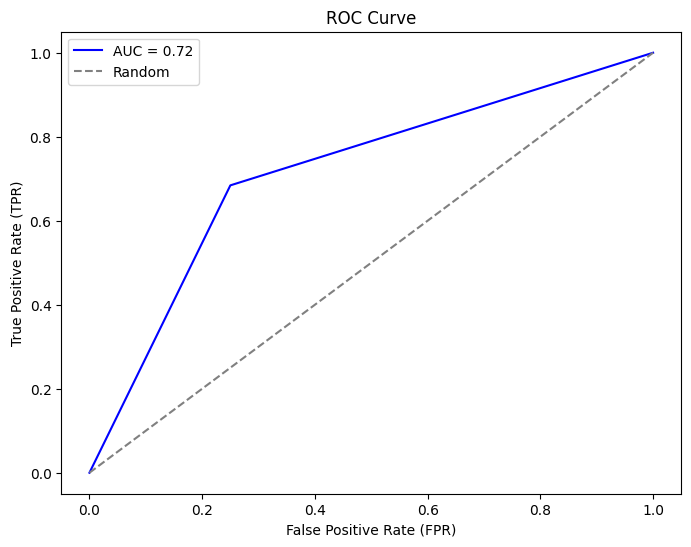

In [91]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

#Predicting probabilities for positive class
y_probs = dt_classifier.predict_proba(X_val)[:,1]

#Calculating the ROC curve
fpr, tpr, threshold = roc_curve(y_val, y_probs)

#Calculating AUC value
auc_value = roc_auc_score(y_val, y_probs)

#Plotting the ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.2f}')
#Adding the random classifier
plt.plot([0, 1], [0,1], linestyle = '--', color = 'gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans - **Training Set Performance**: The model has perfect scores on the training data (Accuracy, Precision, Recall all 1.0). This indicates that the model has memorized the training data perfectly.

**Validation Set Performance**: The model's performance drops significantly on the validation data. This drop in performance when moving from training data to validation data is a classic sign of overfitting.

**High Bias**: The model does not appear to suffer from high bias, as it performs exceptionally well on the training data. High bias would be indicated by poor performance on the training data, suggesting that the model is too simple to capture the underlying patterns.

**High Variance**: The model likely has high variance, given the large discrepancy between training and validation performance. This is supported by the perfect training scores versus much lower validation scores.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [92]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###

#Initialize the classifier
rf_classifier = RandomForestClassifier(random_state = 30)

#Fit classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [94]:
### Make predictions on the training data
### WRITE CODE HERE ###
y_pred_rf = rf_classifier.predict(X_train)
y_pred_rf

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0])

Print accuracy, precision and recall for the predictions made on the training data.

In [95]:
accuracy, precision, recall = evaluate_classification(y_train, y_pred_rf)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [96]:
### Make predictions on the validation data
### WRITE CODE HERE ###
y_pred_val_rf = rf_classifier.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [97]:
### WRITE CODE HERE ###
accuracy, precision, recall = evaluate_classification(y_val, y_pred_val_rf)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.8222
Precision: 0.8272
Recall: 0.8222


Plot ROC curve and obtain AUC for the validation predictions

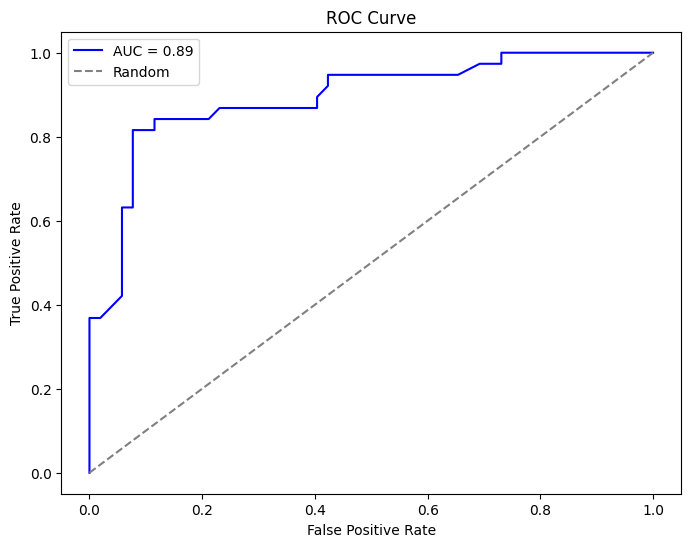

In [98]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

#Predicting proabilities for positive class
y_probs_rf = rf_classifier.predict_proba(X_val)[:, 1]

#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_rf)

#Calculate AUC value
auc_value = roc_auc_score(y_val, y_probs_rf)

#Plot ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0,1], linestyle='--', color = 'gray', label = 'Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.

Ans- The Random Forest model outperforms the Decision Tree model on precision, recall, and accuracy, indicating lower bias and variance.

The ensemble approach of Random Forest helps generalize better to unseen data, reducing overfitting and capturing complex patterns in the dataset. Therefore, the Random Forest model is considered an improvement over the Decision Tree model.


## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [118]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

#Setting up the hyperparameter grid
param_grid = {
    'max_depth': [2,4,10,None], #Maximum number of levels in the tree
    'max_features': ['sqrt','log2'], #Number of features to consider at every split
    'min_samples_leaf': [1, 2, 4, 7], #Minimum number of samples required at each leaf node
    'min_samples_split': [2, 5, 10], #Minimum number of samples required to split a node
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)] #Number of trees in random forest
}
print(param_grid)

{'max_depth': [2, 4, 10, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4, 7], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


The various hyperparameters in the Hyperparameter grid are defined below:
* **'max_depth'** - The maximum depth of the trees in the forest. Deeper trees may capture more complex relationships but are more prone to overfitting.

* **'max_features'** hyperparameter determines the maximum number of features considered for splitting a node in the decision tree. It controls the randomness of each tree.

* **'min_samples_leaf'** - Controls the minimum number of samples required to be a leaf node i.e. a terminal node or a decision. Higher values can prevent overfitting.

* **'min_samples_split'** - It represents the minimum number of samples needed to split an internal node before declaring the node as a terminal leaf. Higher values can prevent overfitting.

* **'n_estimators'** - Number of trees in the forest, higher number of
trees generally improves the model performance but also increases computational cost.

In [119]:
#Define the random forest classifier
rf = RandomForestClassifier(random_state=30)

In [120]:
#Create the Grid Search Object
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

#Verbose controls the amt of info printed during the grid search
# 2 - Display a progress bar and the estimated time remaining for each combination

#n_jobs controls the number of parallel jobs to run during the grid search
# Any positive number is the specified number of processors.

We are using '**recall**' for scoring the model because we are predicting presence of heart disease or not and hence **False Negatives** would be highly undesriable for our use case.
We would not want to miss someone who has heart disease, hence we maximize the recall of our model.

In [121]:
### Fit on the training data with all sets of parameters.
### WRITE CODE HERE ###
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157,
                                          178, 200]},
             scoring='recall', verbose=2)

Display the parameters of the best model.

In [122]:
# Print the best parameters
### WRITE CODE HERE ###
best_params = grid_search.best_params_
print(best_params)

#Get the best model
best_rf_classifier = grid_search.best_estimator_

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 52}


In [123]:
#Parameter values previously
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [124]:
# Print the best score
best_score = grid_search.best_score_

print(f'Best Score: {best_score:.4f}')

Best Score: 0.8182


The best score represents the model's average of the 'recall' score in the different folds. Since, we used the 'recall' parameter for tuning the model we get best score in terms of 'recall.

In [125]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the validation set and display accuracy, precision and recall.

### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_pred_rf = best_rf_classifier.predict(X_train)

accuracy, precision, recall = evaluate_classification(y_train, y_pred_rf)

print(f'Accuracy on Training set: {accuracy:.4f}')
print(f'Precision on Training set: {precision:.4f}')
print(f'Recall on Training set: {recall:.4f}\n')

### Make predictions on the validation set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_pred_val_rf = best_rf_classifier.predict(X_val)

accuracy, precision, recall = evaluate_classification(y_val, y_pred_val_rf)

print(f'Accuracy on Validation set: {accuracy:.4f}')
print(f'Precision on Validation set: {precision:.4f}')
print(f'Recall on Validation set: {recall:.4f}')

Accuracy on Training set: 0.9807
Precision on Training set: 0.9807
Recall on Training set: 0.9807

Accuracy on Validation set: 0.8333
Precision on Validation set: 0.8403
Recall on Validation set: 0.8333


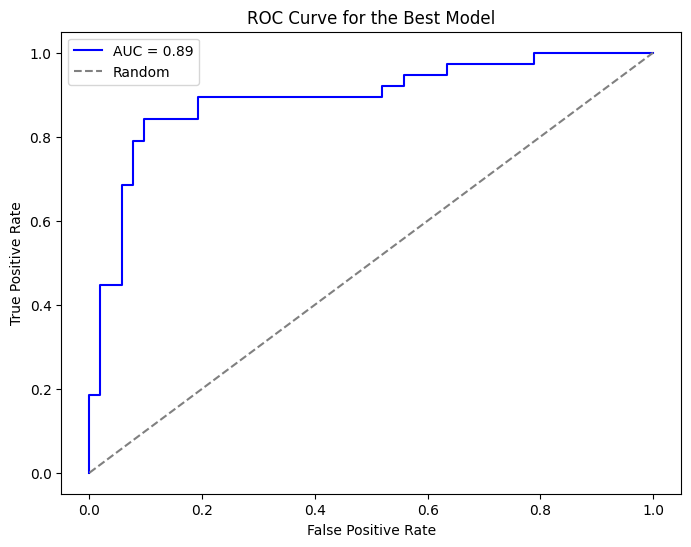

In [126]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes.

### WRITE CODE HERE

#Predicting proabilities for positive class
y_probs_rf = best_rf_classifier.predict_proba(X_val)[:, 1]

#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_rf)

#Calculate AUC value
auc_value = roc_auc_score(y_val, y_probs_rf)

#Plot ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0,1], linestyle='--', color = 'gray', label = 'Random')
plt.title('ROC Curve for the Best Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Individual student contribution

Geethika Kalvapalli - Dataset 1 Setup + Standardization and One-hot Encoding + Logistic Regression + ROC curve

Qianwen Xi - Dataset 1 Hyperparameters + Test set

Helen Chen- Dataset 2 Setup + Decision Tree

Armaan Dhanda - Dataset 2 Random Forest + Hyperparameters

Chitransh Lodha - Dataset 2 Hyperparameters + Decision Tree + Random Forest
